In [2]:
import requests
from sklearn.datasets import load_svmlight_file
import numpy as np
# get the data
r = requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t")
r1=requests.get("https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a")
from io import BytesIO

# load data
data=load_svmlight_file(BytesIO(r1.content))
print(data)
data[1][np.where(data[1]==-1)]=0
x_train,y_train=data[0].todense(),data[1].reshape(len(data[1]),-1)
data=load_svmlight_file(BytesIO(r.content))
data[1][np.where(data[1]==-1)]=0
x_valid,y_valid=data[0].todense(),data[1].reshape(len(data[1]),-1)


(<32561x123 sparse matrix of type '<class 'numpy.float64'>'
	with 451592 stored elements in Compressed Sparse Row format>, array([-1., -1., -1., ..., -1., -1.,  1.]))


In [2]:
# preprocess
n, m= np.shape(x_train)
x_train=np.column_stack((np.ones(n), x_train))
p, k = np.shape(x_valid)
x_valid=np.column_stack((x_valid,np.zeros(p)))
x_valid=np.column_stack((np.ones(p), x_valid))

In [9]:
# define some important parameters
batch_size=300
epochs=600
alpha=0.1
beta1=0.9
beta2=0.999
eps=1e-8

In [10]:
# initialize some parameters
epoch_set=[]
l_adam=[]
grad = np.zeros((m+1, 1))
w = np.random.rand(m+1, 1)
mom = np.zeros((m+1, 1))
s = np.zeros((m+1, 1))

In [11]:
def labeling(x):
    if x>=0.5:
        return 1
    else:
        return 0

In [12]:
import random
# training and optimize
for ep in range(epochs+1):
    # training
    st=random.randint(0,n-batch_size-1)
    for j in range(st,st+batch_size):
        h=1/(1+np.exp(-x_train[j]*w))
        grad +=((h-y_train[j])*x_train[j]).T
    grad=grad/batch_size
    mom=beta1*mom+(1-beta1)*grad
    s=beta2*s+np.multiply((1-beta2)*grad,grad)
    w = w - alpha*mom/(np.sqrt(s)+eps)
    
    if ep%10==0:
        epoch_set.append(ep)
        loss=0.0
        res=0
        for i in range(p):
            h=1/(1+np.exp(-x_valid[i]*w))
            loss+=(y_valid[i]*np.log(h)+(1-y_valid[i])*np.log(1-h))
            if labeling(h)==y_valid[i]:
                res=res+1
        loss=np.asarray(-loss/p)
        l_adam.append(loss[0][0])

No handles with labels found to put in legend.


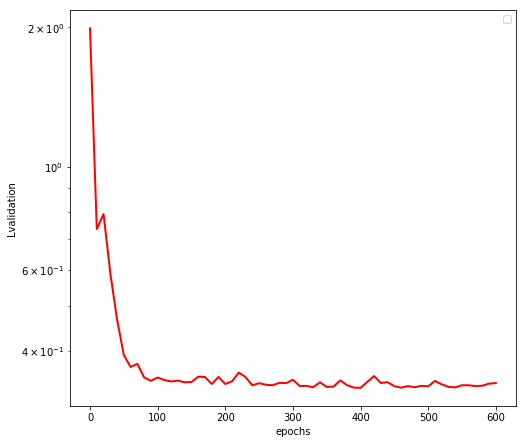

In [18]:
# output the result
import matplotlib.pyplot as plt
plt.figure(figsize=(8,16))
plt.subplot(211)
plt.xlabel('epochs')
plt.ylabel('Lvalidation')
plt.plot(epoch_set,l_adam,color='r',linewidth=2,linestyle='-')
plt.yscale('log')
plt.legend()
